## Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Obtain the bssid_id number of the ssid name: eduroam & ditwifi

In [2]:
# Read CSV file of DIT BSSID
df1_bssid = pd.read_csv("DIT_BSSID.csv")

# Make a copy
df_bssid = df1_bssid.copy()
df_bssid_eduroam = df1_bssid.copy()
df_bssid_ditwifi = df1_bssid.copy()

# Extract from CSV file the 'bssid_id' numbers of the ssid = 'eduroam' & ssid = 'ditwifi'
# 1st drop unnnecesary data
df_bssid.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_ditwifi.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_eduroam.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)

# 2nd get only values of bssid_id of the ssid: 'eduroam' and 'ditwifi'
df_bssid_eduroam = df_bssid_eduroam[df_bssid_eduroam["ssid"] == 'eduroam']
df_bssid_ditwifi = df_bssid_ditwifi[df_bssid_ditwifi["ssid"] == 'ditwifi']
df_bssid = df_bssid[(df_bssid["ssid"] == 'eduroam') | (df_bssid['ssid'] == 'ditwifi')]

df_bssid_eduroam


,bssid_id,ssid
98,20522,eduroam
196,43718,eduroam
204,43822,eduroam
209,44210,eduroam
226,44667,eduroam
...,...,...
4151,77087,eduroam
4168,77104,eduroam
4188,77124,eduroam
4241,77177,eduroam


### Obtain form CSV DIT_AP_Traffic_Class the 'monitor_radio_id' that corresponds to the 'bssid_id' of 'eduroam' and 'ditwifi'
* Info: https://es.acervolima.com/python-pandas-dataframe-isin/

In [3]:
# Read CSV file of DIT BSSID
df1_traffic_class = pd.read_csv("DIT_AP_Traffic_Class.csv")

# Make a copy
df_traffic_class = df1_traffic_class.copy()
df_traffic_class_eduroam = df1_traffic_class.copy()
df_traffic_class_ditwifi = df1_traffic_class.copy()

# 1st drop unnnecesary data
df_traffic_class.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_eduroam.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_ditwifi.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)

# 2nd only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
bssid_id = df_bssid["bssid_id"]
bssid_id_eduroam = df_bssid_eduroam["bssid_id"]
bssid_id_ditwifi = df_bssid_ditwifi["bssid_id"]

# Filter
df_traffic_class_filter = df_traffic_class[df_traffic_class["bssid_id"].isin(bssid_id)]
df_traffic_class_eduroam_filter = df_traffic_class_eduroam[df_traffic_class_eduroam["bssid_id"].isin(bssid_id_eduroam)]
df_traffic_class_ditwifi_filter = df_traffic_class_ditwifi[df_traffic_class_ditwifi["bssid_id"].isin(bssid_id_ditwifi)]

# Show data frame
df_traffic_class_ditwifi

,bssid_id,monitor_radio_id
0,74167,1126
1,74167,1126
2,74184,1126
3,74186,1126
4,74173,1126
...,...,...
472382,74271,1137
472383,74271,1137
472384,74273,1137
472385,74273,1137


In [4]:
# Show data frame
df_traffic_class_ditwifi_filter

,bssid_id,monitor_radio_id
3,74186,1126
5,74171,1126
7,74210,1138
8,74212,1138
9,74212,1138
...,...,...
472379,74276,1137
472382,74271,1137
472383,74271,1137
472384,74273,1137


### Repeat with DIT_Channel.csv
* Now with monitor_radio_id

In [5]:
# Read CSV file of DIT BSSID
df1_channel = pd.read_csv("DIT_Channel.csv")

# Make a copy
df_channel = df1_channel.copy()
df_channel_eduroam = df1_channel.copy()
df_channel_ditwifi = df1_channel.copy()

# Filter data of random days (22,23, 24 and 25 -08-2022) only created in the afternoons (15h-21h)
df_channel = df_channel[((df_channel['created_at'] > '2018-05-21 15:00:00') & (df_channel['created_at'] <= '2018-05-21 21:00:00')) |
((df_channel['created_at'] > '2018-05-22 15:00:00') & (df_channel['created_at'] <= '2018-05-22 21:00:00')) |
((df_channel['created_at'] > '2018-05-23 15:00:00') & (df_channel['created_at'] <= '2018-05-23 21:00:00')) |
((df_channel['created_at'] > '2018-05-24 15:00:00') & (df_channel['created_at'] <= '2018-05-24 21:00:00')) |
((df_channel['created_at'] > '2018-05-25 15:00:00') & (df_channel['created_at'] <= '2018-05-25 21:00:00'))]

df_channel_eduroam = df_channel_eduroam[((df_channel_eduroam['created_at'] > '2018-05-21 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-21 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-22 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-22 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-23 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-23 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-24 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-24 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-25 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-25 15:00:00'))]

df_channel_ditwifi = df_channel_ditwifi[((df_channel_ditwifi['created_at'] > '2018-05-21 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-21 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-22 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-22 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-23 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-23 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-24 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-24 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-25 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-25 15:00:00'))]

# Drop unnnecesary data (All except monitor_radio_id, bw_busy and total_devices)
df_channel.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_eduroam.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_ditwifi.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)


# Only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
df_channel_ditwifi


,monitor_radio_id,bw_busy,total_devices
16485,1122,0.0267,18
16486,1122,0.1119,26
16487,1122,0.0788,17
16488,1122,0.0768,11
16489,1122,0.0741,16
...,...,...,...
427307,1160,0.1278,44
427308,1160,0.1573,50
427309,1160,0.2360,43
427310,1160,0.1243,40


In [6]:
# Save monitor_radio_id
monitor_radio_id_traffic = df_traffic_class_filter["monitor_radio_id"]
monitor_radio_id_traffic_eduroam = df_traffic_class_eduroam_filter["monitor_radio_id"]
monitor_radio_id_traffic_ditwifi = df_traffic_class_ditwifi_filter["monitor_radio_id"]

# Filter table by monitor_radio_id 
df_channel_filter = df_channel[df_channel["monitor_radio_id"].isin(monitor_radio_id_traffic)]
df_channel_eduroam_filter = df_channel_eduroam[df_channel_eduroam["monitor_radio_id"].isin(monitor_radio_id_traffic_eduroam)]
df_channel_ditwifi_filter = df_channel_ditwifi[df_channel_ditwifi["monitor_radio_id"].isin(monitor_radio_id_traffic_ditwifi)]

# Show data frame
df_channel_ditwifi

,monitor_radio_id,bw_busy,total_devices
16485,1122,0.0267,18
16486,1122,0.1119,26
16487,1122,0.0788,17
16488,1122,0.0768,11
16489,1122,0.0741,16
...,...,...,...
427307,1160,0.1278,44
427308,1160,0.1573,50
427309,1160,0.2360,43
427310,1160,0.1243,40


In [7]:
# Show data frame
df_channel_filter

,monitor_radio_id,bw_busy,total_devices
17300,1122,0.0524,36
17301,1122,0.1129,50
17302,1122,0.2227,58
17303,1122,0.1394,42
17304,1122,0.0251,38
...,...,...,...
427656,1160,0.1144,30
427657,1160,0.1311,19
427658,1160,0.0625,11
427659,1160,0.1067,20


### Remove categorical data

In [8]:
# Save monitor_radio_id
monitor_radio_id_channel = df_channel_filter["monitor_radio_id"]
monitor_radio_id_channel_eduroam = df_channel_eduroam_filter["monitor_radio_id"]
monitor_radio_id_channel_ditwifi = df_channel_ditwifi_filter["monitor_radio_id"]


# Drop categorical data
df_channel_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_eduroam_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_ditwifi_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)

# Show data frame
df_channel_filter

,bw_busy,total_devices
17300,0.0524,36
17301,0.1129,50
17302,0.2227,58
17303,0.1394,42
17304,0.0251,38
...,...,...
427656,0.1144,30
427657,0.1311,19
427658,0.0625,11
427659,0.1067,20


### Elbow method (For eduroam)

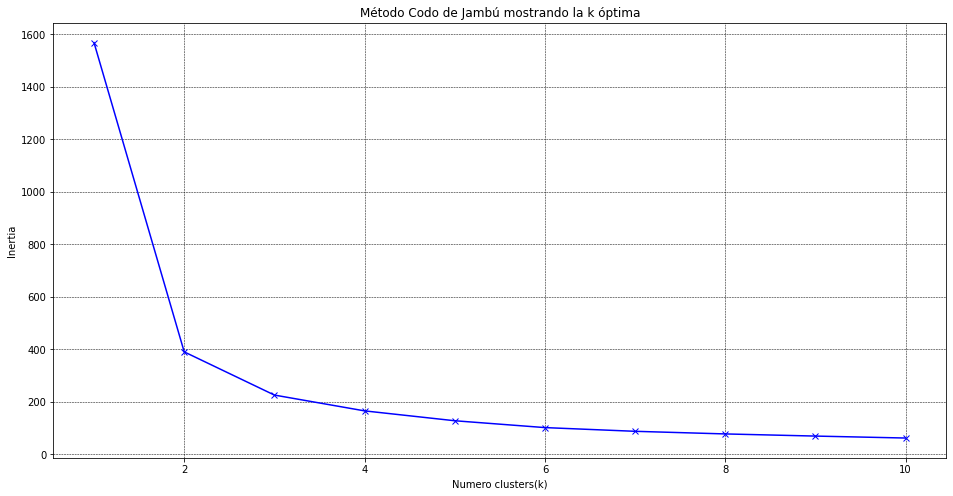

In [9]:
# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
normalize_eduroam = min_max_scaler.fit_transform(df_channel_eduroam_filter)
df_normalize_eduroam = pd.DataFrame(normalize_eduroam)

# Rename
df_normalize_eduroam = df_normalize_eduroam.rename(columns={0: 'bw_busy', 1: 'total_devices'})

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo_eduroam = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo_eduroam.fit(df_normalize_eduroam)
    inertia.append(algoritmo_eduroam.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')  #'bx-' : b = blue, x = puntos como 'x' y - = línea continua
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### Elbow method (For ditwifi)

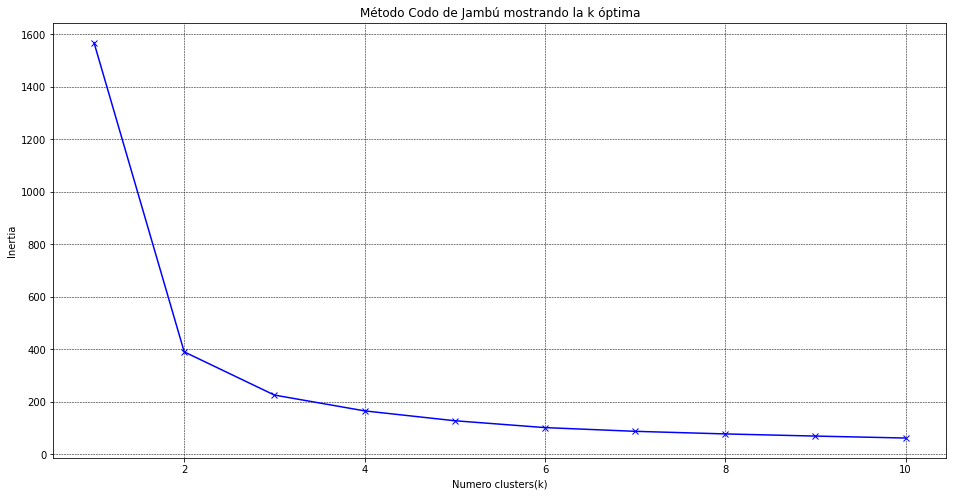

In [10]:
# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
normalize_ditwifi = min_max_scaler.fit_transform(df_channel_ditwifi_filter)
df_normalize_ditwifi = pd.DataFrame(normalize_ditwifi)

# Rename
df_normalize_ditwifi = df_normalize_ditwifi.rename(columns={0: 'bw_busy', 1: 'total_devices'})

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo_ditwifi = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo_ditwifi.fit(df_normalize_ditwifi)
    inertia.append(algoritmo_ditwifi.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')  #'bx-' : b = blue, x = puntos como 'x' y - = línea continua
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### Elbow method (For eduroam & ditwifi)

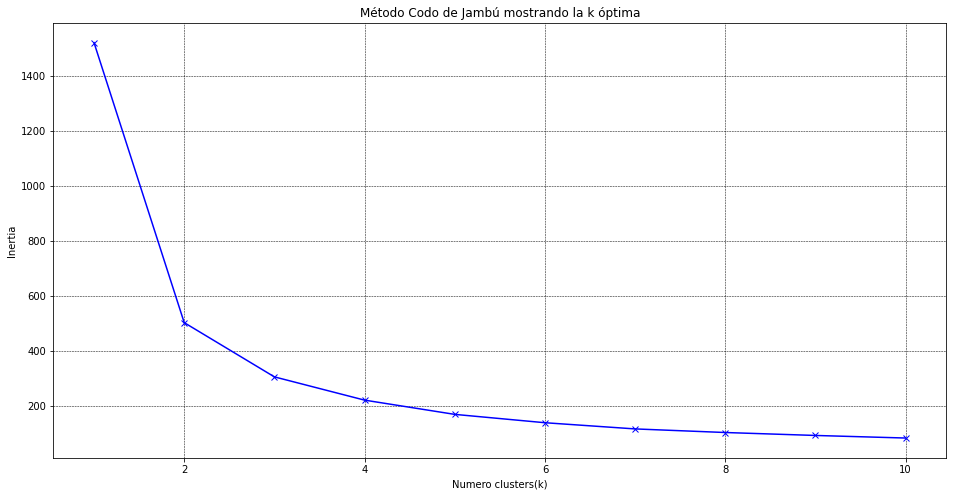

In [11]:
# Normalize data 
min_max_scaler = preprocessing.MinMaxScaler()
normalize = min_max_scaler.fit_transform(df_channel_filter)
df_normalize = pd.DataFrame(normalize)

# Rename
df_normalize = df_normalize.rename(columns={0: 'bw_busy', 1: 'total_devices'})

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df_normalize)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-') #'bx-' : b = blue, x = puntos como 'x' y - = línea continua
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### k-means from sklearn (Eduroam)
* With the Elbow method we obtain the optimal k is 3

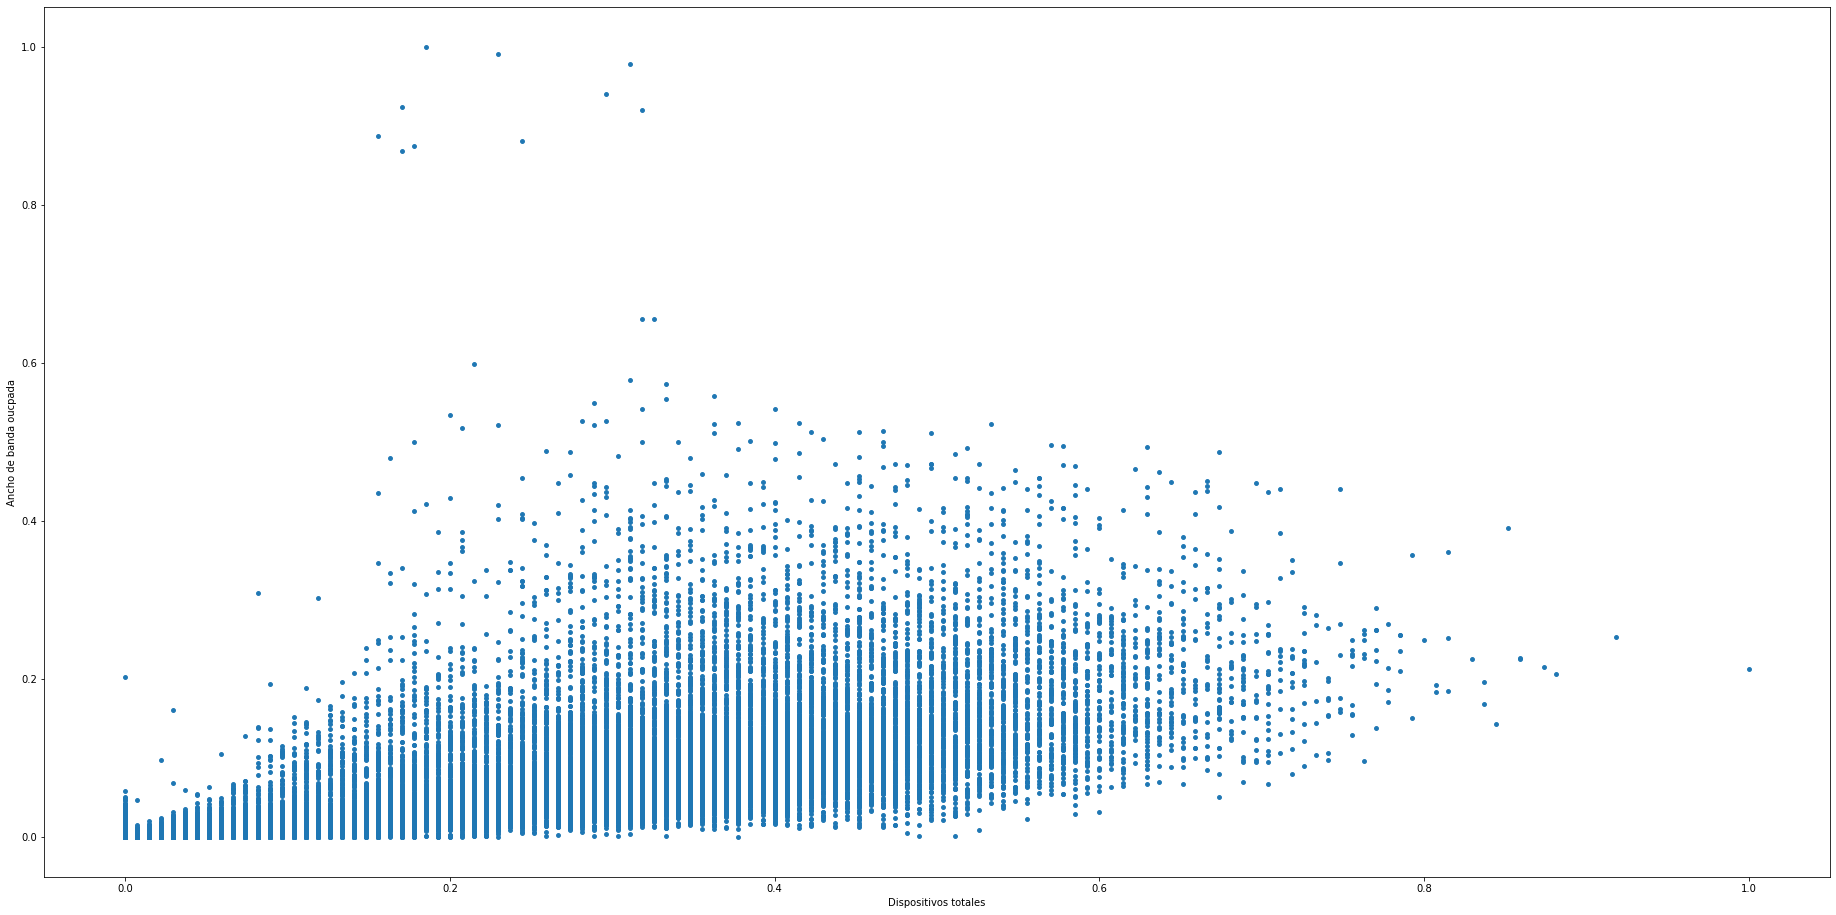

In [12]:
# Number of clusters
k_eduroam = 3

# Kmeans
kmeans_eduroam = KMeans(n_clusters= k_eduroam) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster_eduroam = kmeans_eduroam.fit_predict(df_normalize_eduroam)
df_normalize_eduroam['cluster'] = cluster_eduroam

# Obtain centroids coordinates
centroids_eduroam = kmeans_eduroam.cluster_centers_

# Asign x and y
x_eduroam = df_normalize_eduroam['total_devices'].values
y_eduroam = df_normalize_eduroam['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x_eduroam, y_eduroam, marker='.', s=60)


### k-means from sklearn (Ditwifi)
* With the Elbow method we obtain the optimal k is 3

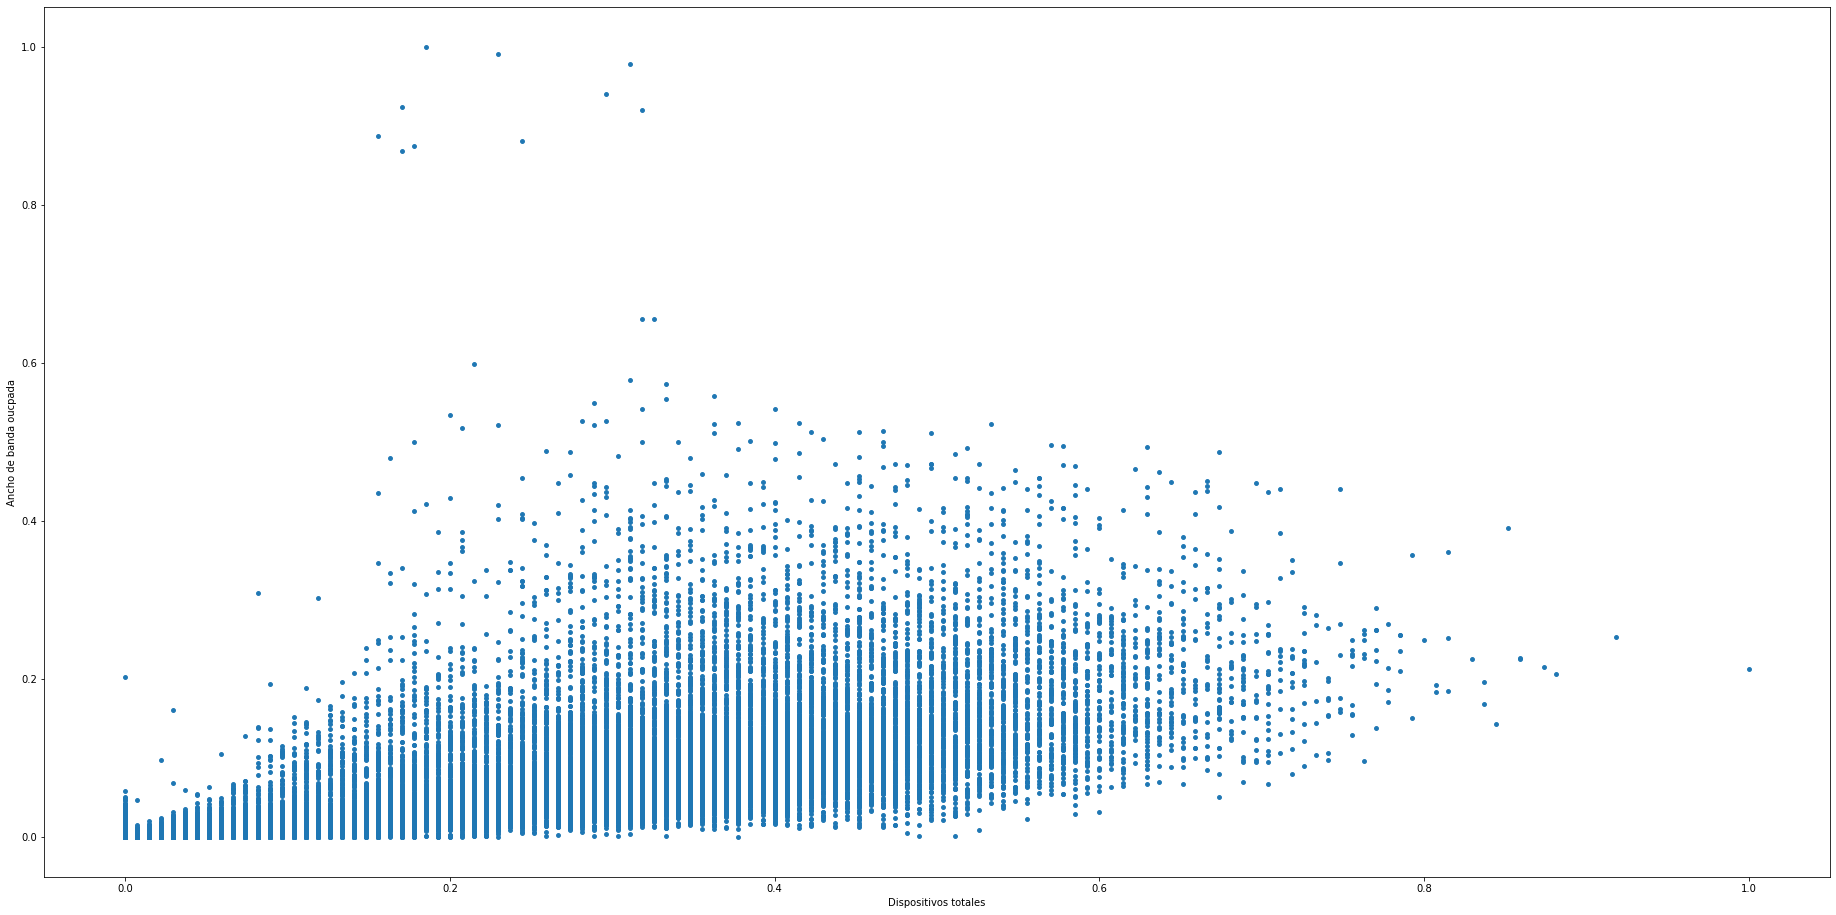

In [13]:
# Number of clusters
k_ditwifi = 3

# Kmeans
kmeans_ditwifi = KMeans(n_clusters= k_ditwifi) #default: init = k-means++, n_init = 10, max_iter = 300


# Labels of data
cluster_ditwifi = kmeans_ditwifi.fit_predict(df_normalize_ditwifi)
df_normalize_ditwifi['cluster'] = cluster_ditwifi

# Obtain centroids coordinates
centroids_ditwifi = kmeans_ditwifi.cluster_centers_

# Asign x and y
x_ditwifi = df_normalize_ditwifi['total_devices'].values
y_ditwifi = df_normalize_ditwifi['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x_ditwifi, y_ditwifi, marker='.', s=60)

### k-means from sklearn (Eduroam & Ditwifi)
* With the Elbow method we obtain the optimal k is 3

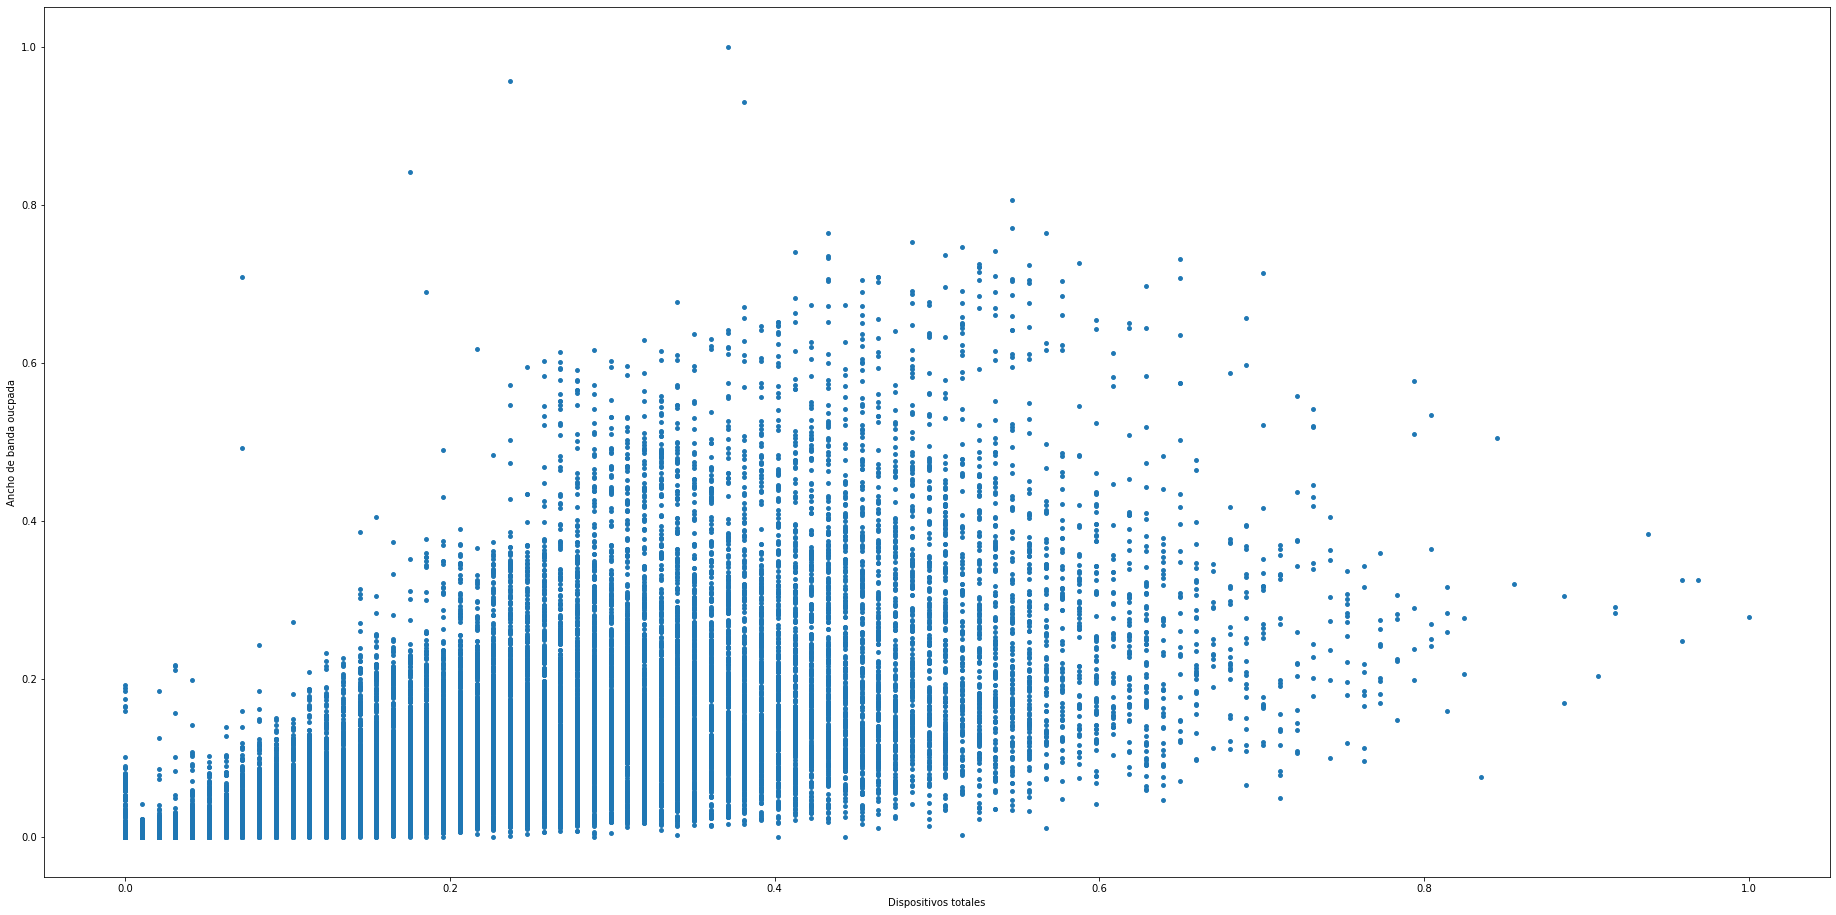

In [14]:
# Number of clusters
k = 3

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)
df_normalize['cluster'] = cluster

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic representation of k-means clusters (Eduroam)

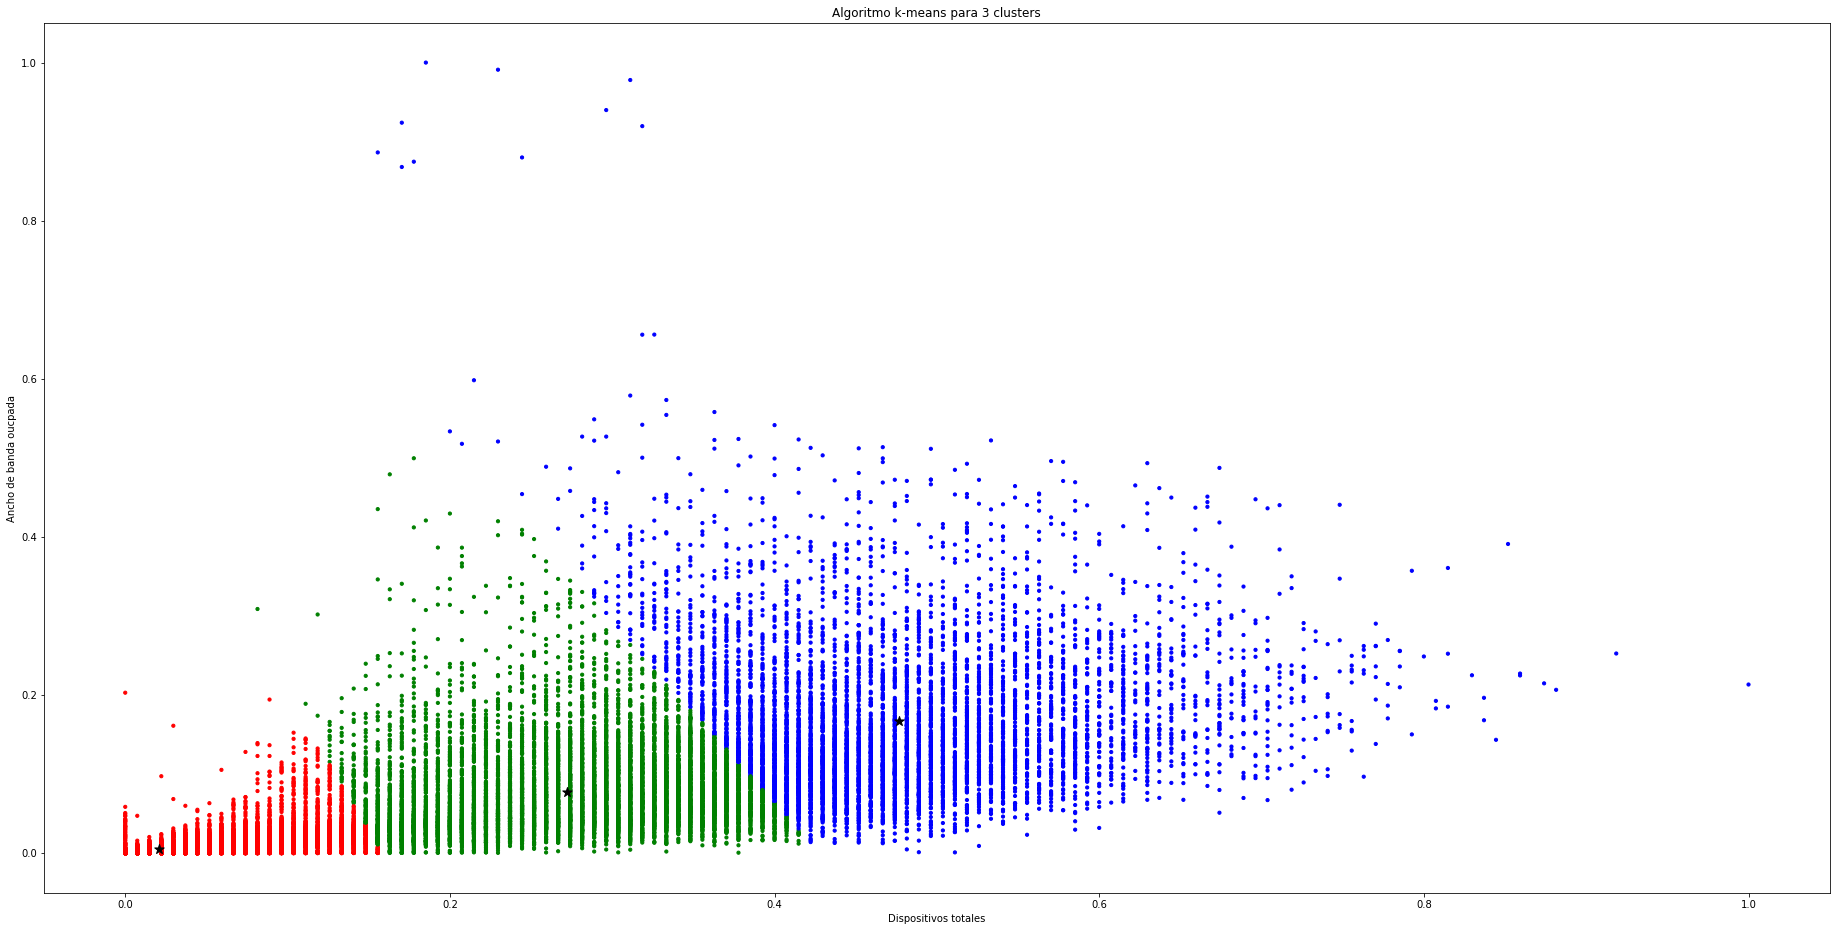

In [15]:
# Asign colors to clusters
colors_eduroam = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign_eduroam = []
for row in cluster_eduroam:
    asign_eduroam.append(colors_eduroam[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x_eduroam, y_eduroam, marker='.', c = asign_eduroam, s=40)
plt.scatter(centroids_eduroam[:, 1], centroids_eduroam[:, 0], marker='*', c='black', s=100)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k_eduroam)+' clusters')

# Show plot
plt.show()

In [16]:
# Show info of clusters
copy_eduroam = pd.DataFrame()
copy_eduroam['bw_busy']=df_normalize_eduroam['bw_busy'].values
copy_eduroam['total_devices']=df_normalize_eduroam['total_devices'].values
copy_eduroam['cluster'] = df_normalize_eduroam['cluster'].values
cantidadGrupo_eduroam =  pd.DataFrame()
cantidadGrupo_eduroam['cantidad']=copy_eduroam.groupby('cluster').size()
cantidadGrupo_eduroam

,cantidad
cluster,
0,20336
1,9998
2,6890


### Graphic representation of k-means clusters (Ditwifi)

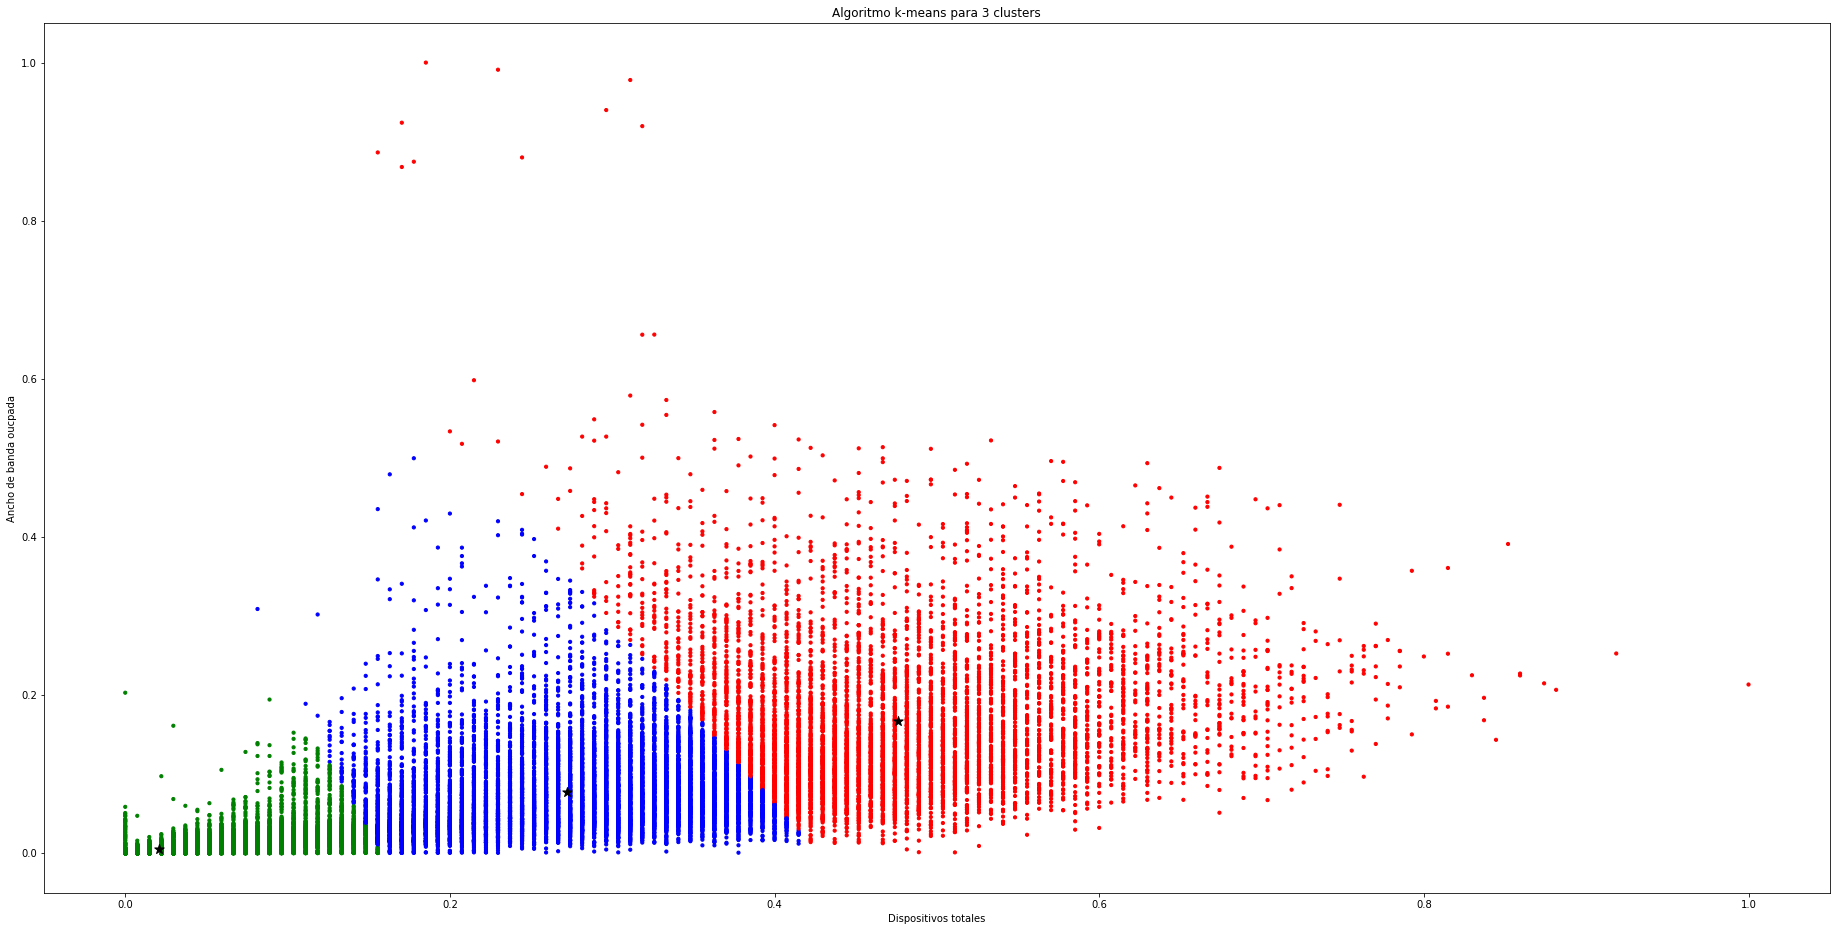

In [17]:
# Asign colors to clusters
colors_ditwifi = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign_ditwifi = []
for row in cluster_ditwifi:
    asign_ditwifi.append(colors_ditwifi[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x_ditwifi, y_ditwifi, marker='.', c = asign_ditwifi, s=40)
plt.scatter(centroids_ditwifi[:, 1], centroids_ditwifi[:, 0], marker='*', c='black', s=100)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k_ditwifi)+' clusters')

# Show plot
plt.show()

In [18]:
# Show info of cluster
copy_ditwifi = pd.DataFrame()
copy_ditwifi['bw_busy']=df_normalize_ditwifi['bw_busy'].values
copy_ditwifi['total_devices']=df_normalize_ditwifi['total_devices'].values
copy_ditwifi['cluster'] = df_normalize_ditwifi['cluster'].values
cantidadGrupo_ditwifi =  pd.DataFrame()
cantidadGrupo_ditwifi['cantidad']=copy_ditwifi.groupby('cluster').size()
cantidadGrupo_ditwifi

,cantidad
cluster,
0,6901
1,20334
2,9989


### Graphic representation of k-means clusters (Eduroam & Ditwifi)

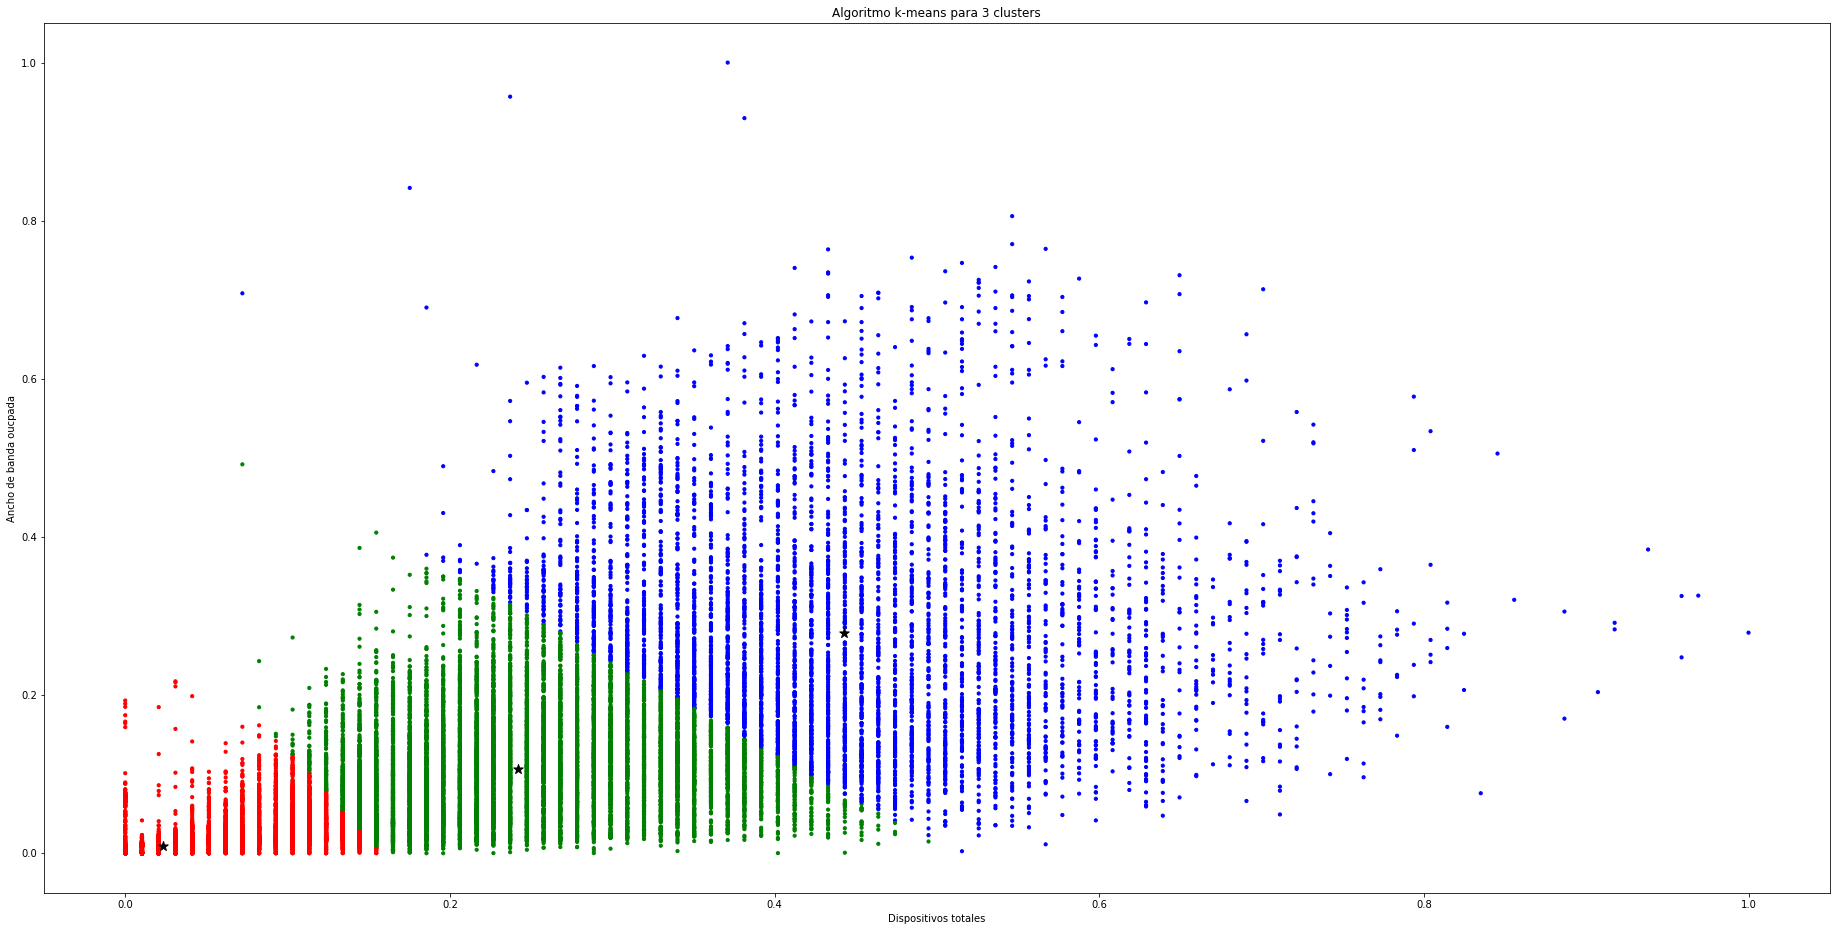

In [19]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

In [20]:
# Show info of cluster
copy = pd.DataFrame()
copy['bw_busy']=df_normalize_eduroam['bw_busy'].values
copy['total_devices']=df_normalize_eduroam['total_devices'].values
copy['cluster'] = df_normalize_eduroam['cluster'].values
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('cluster').size()
cantidadGrupo

,cantidad
cluster,
0,20336
1,9998
2,6890
